In [1]:
%pylab inline
from pandas import Series, DataFrame
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('mocar_complete_201511.csv', index_col='交易日期', parse_dates=True, thousands=',').drop('流水号', axis=1)

In [3]:
# 所有流水
df

收入                            摘要       银行账户
交易日期                                                         
2015-03-03    174.63                        POS机收入  工商银行中关村支行
2015-03-15     17.86                        POS机收入  工商银行中关村支行
2015-03-16     17.86                        POS机收入  工商银行中关村支行
2015-03-20      8.93                        POS机收入  工商银行中关村支行
2015-03-21      0.50                        POS机收入  工商银行中关村支行
2015-03-21    132.96                        POS机收入  工商银行中关村支行
2015-03-23     86.32                        POS机收入  工商银行中关村支行
2015-03-24     76.40                        POS机收入  工商银行中关村支行
2015-03-25    754.07                        POS机收入  工商银行中关村支行
2015-03-26     85.33                        POS机收入  工商银行中关村支行
2015-03-27    268.89                        POS机收入  工商银行中关村支行
2015-03-27  10000.00  北京摩卡移动汽车技术服务有限公司（工商银行开户激活费用）  工商银行中关村支行
2015-03-30     85.33                        POS机收入  工商银行中关村支行
2015-03-31    969.38                        POS机收入  工商银行中关村支行
2015-04-01     45.64                        POS机收入  工商银行中关村支行
2015-04-02    305.60                        POS机收入  工商银行中关村支行
2015-04-03      8.93                        POS机收入  工商银行中关村支行
2015-04-04      8.93                        POS机收入  工商银行中关村支行
2015-04-05      8.93                        POS机收入  工商银行中关村支行
2015-04-07     85.33                        POS机收入  工商银行中关村支行
2015-04-08     80.37                        POS机收入  工商银行中关村支行
2015-04-09    112.12                        POS机收入  工商银行中关村支行
2015-04-10     44.65                        POS机收入  工商银行中关村支行
2015-04-11    170.67                        POS机收入  工商银行中关村支行
2015-04-12     17.86                        POS机收入  工商银行中关村支行
2015-04-13     62.51                        POS机收入  工商银行中关村支行
2015-04-14    584.41                        POS机收入  工商银行中关村支行
2015-04-16   1072.57                        POS机收入  工商银行中关村支行
2015-04-17    182.67                        POS机收入  工商银行中关村支行
2015-04-18   1604.39                        POS机收入  工商银行中关村支行
...              ...                           ...        ...
2015-11-30    149.25                        POS机收入    招行西二旗支行
2015-11-30  20258.00               订单收款11.25-11.29    招行西二旗支行
2015-11-30    288.00                           保养卡    招行西二旗支行
2015-11-30    100.30           提回贷记:00012671071,汇兑    招行西二旗支行
2015-11-30     26.10               百糯通知18430458-付1    招行西二旗支行
2015-11-30   2066.19            利息：2066.19  扣税：.00    招行北苑路支行
2015-11-30   5430.00                          西安存现    招行北苑路支行
2015-11-30    277.90                        POS机收入    招行北苑路支行
2015-11-30    473.40                        POS机收入    招行北苑路支行
2015-11-30    740.40                        POS机收入    招行北苑路支行
2015-11-30   1787.49                        POS机收入    招行北苑路支行
2015-11-30   1820.24                        POS机收入    招行北苑路支行
2015-11-30   1994.93                        POS机收入    招行北苑路支行
2015-11-30   2334.36                        POS机收入    招行北苑路支行
2015-11-30   7742.45                        POS机收入    招行北苑路支行
2015-11-30   1995.00                           保养卡    招行北苑路支行
2015-11-30   5928.00                         天津分公司    招行北苑路支行
2015-11-30  39758.25                        POS机收入    招行北苑路支行
2015-11-30   5641.00                            成都    招行北苑路支行
2015-11-30   2851.00                          深圳地区    招行北苑路支行
2015-11-30    359.00                         深圳保养卡    招行北苑路支行
2015-11-30   5863.00                            广州    招行北苑路支行
2015-11-30   1045.40                          广州美团    招行北苑路支行
2015-11-30    196.00                          广州冠军    招行北苑路支行
2015-11-30   2544.00                            佛山    招行北苑路支行
2015-11-30  10288.00                            上海    招行北苑路支行
2015-11-30    399.00                         上海保养卡    招行北苑路支行
2015-11-30   6490.00                            苏州    招行北苑路支行
2015-11-30   5981.00                            杭州    招行北苑路支行
2015-11-30    748.00                         杭州保养卡    招行北苑路支行

[3816 rows x 3 columns]

In [4]:
# 所有支出项
spent = df[df['收入'] < 0]

In [5]:
# 支出项的摘要字段组成的字符串向量
remarks_vec = spent['摘要'].str

In [6]:
# 所有摘要字段不包括 "借", "内转", "理财"的支出项，以及摘要字段不包括 "租" 但包括 "保证" 或 "押" 的支出项
# 也就是说不包各种内部互转的流水，以及各种将来应该返还的保证金或押金
expenses = spent[~(remarks_vec.contains('借|内转|理财', na=False) |
                   (~remarks_vec.contains('租', na=False) &
                    remarks_vec.contains('保证|押', na=False)))]

In [7]:
# 得到了所有视为『成本』的支出项
expenses

收入                              摘要       银行账户
交易日期                                                            
2015-06-23     -90.00  其他应付款待清算过渡款项-分行清算专用（对公小额账户管理费）  工商银行中关村支行
2015-09-21     -90.00  其他应付款待清算过渡款项-分行清算专用（对公小额账户管理费）  工商银行中关村支行
2015-09-28     -12.00                   电子银行对公人民币结算收入  工商银行中关村支行
2014-09-11     -35.00                    网上企业银行-数字证书费    招行西二旗支行
2014-09-11     -35.00                    网上企业银行-数字证书费    招行西二旗支行
2014-09-16     -35.00                    购买支票手续费-现金支票    招行西二旗支行
2014-09-16   -1200.00                   任兴武8月费用报销停车费等    招行西二旗支行
2014-09-16  -10000.00                    陈燕山8月费用报销配件款    招行西二旗支行
2014-09-16  -40000.00                        7-8月配件费用    招行西二旗支行
2014-09-17  -45049.00                      8-9月购买维修配件    招行西二旗支行
2014-09-17   -2500.00                   摩卡8月员工工资  研发部    招行西二旗支行
2014-09-17   -8057.14                   摩卡8月员工工资  总经办    招行西二旗支行
2014-09-17   -5666.67                    摩卡8月员工工资  北分    招行西二旗支行
2014-09-17  -14575.53                        7-8月差旅交通    招行西二旗支行
2014-09-17  -20000.00                      张焱7-8月购买工具    招行西二旗支行
2014-09-18  -20000.00                         支付开发服务费    招行西二旗支行
2014-09-19   -1846.00                          采购电脑主机    招行西二旗支行
2014-09-22   -2700.00                          租用员工宿舍    招行西二旗支行
2014-09-23  -49851.59                    张焱7-8月购买工具费用    招行西二旗支行
2014-09-23   -2000.00                        王昕中石油加油卡    招行西二旗支行
2014-09-27  -11879.00                            王昕报销    招行西二旗支行
2014-09-27  -28886.00                            张焱报销    招行西二旗支行
2014-09-27    -363.00                           任兴武报销    招行西二旗支行
2014-09-27   -2163.00                           蔡晓东报销    招行西二旗支行
2014-09-30  -40824.00                            购买配件    招行西二旗支行
2014-10-04      -0.93                         网银支付手续费    招行西二旗支行
2014-10-05   -1166.11                           #北京社保    招行西二旗支行
2014-10-05   -1490.50                           #北京社保    招行西二旗支行
2014-10-09   -4844.57                         车辆商业险代办    招行西二旗支行
2014-10-10   -1400.00                      王昕-制作易拉宝海报    招行西二旗支行
...               ...                             ...        ...
2015-11-24    -570.00                        刘金宇-交通费等    招行西二旗支行
2015-11-24   -1115.00                        门盼盼-交通费等    招行西二旗支行
2015-11-24   -4200.00                         李玉勇-停车费    招行西二旗支行
2015-11-24     -98.00                          谭成容-餐费    招行西二旗支行
2015-11-24   -1030.00                         陈亚林-购配件    招行西二旗支行
2015-11-24    -500.00                         陈亚林-购工具    招行西二旗支行
2015-11-24    -355.00                         文俊杰-购配件    招行西二旗支行
2015-11-24    -920.00                        成都技师停车费等    招行西二旗支行
2015-11-24   -2519.00                       刘绩波-名片制作等    招行西二旗支行
2015-11-24     -68.00                         胡晓兰-交通费    招行西二旗支行
2015-11-24    -989.00                          晁新淋-餐费    招行西二旗支行
2015-11-24    -201.47                         晁新淋-加油费    招行西二旗支行
2015-11-24   -4590.00                        晁新淋-物料制作    招行西二旗支行
2015-11-24    -964.49                         晁新淋-宽带等    招行西二旗支行
2015-11-24   -2601.50                        广州技师停车费等    招行西二旗支行
2015-11-24  -25000.00                         上海主油卡充值    招行西二旗支行
2015-11-24   -8000.00                         成都主油卡充值    招行西二旗支行
2015-11-24    -388.00                    北分订单221626退款    招行西二旗支行
2015-11-24  -18060.00                         卢克伊尔机油款    招行西二旗支行
2015-11-24   -5598.40                          百度百科充值    招行西二旗支行
2015-11-24   -5174.00                     杭州6-10月份配件款    招行西二旗支行
2015-11-24   -1630.00                     苏州6-10月份配件款    招行西二旗支行
2015-11-24   -5300.00        深圳宿舍房租2015.12.8-2016.1.7    招行西二旗支行
2015-11-24    -400.00                         北分工单20本    招行西二旗支行
2015-11-24  -13448.00                         10月份配件款    招行西二旗支行
2015-11-24   -1200.00                       8月猎头服务费尾款    招行西二旗支行
2015-11-25 -103248.00                     92102：住房公积金    招行西二旗支行
2015-11-26 -583200.00    36台电动车租金2015.12.26-2016.6.25    招行西二旗支行
2015-11-26  -52200.00     杭州3台车租金2015.11.30-2016.5.29 

In [8]:
# 暂不考虑将报销项列为员工薪水福利开支
# 招聘费用是否应列入? 如 '前程无忧'
employee_expenses = expenses[expenses['摘要'].str.contains('工资|公积金|社保|交通费|餐费')]

In [9]:
employee_expenses

收入             摘要     银行账户
交易日期                                         
2014-09-17   -2500.00  摩卡8月员工工资  研发部  招行西二旗支行
2014-09-17   -8057.14  摩卡8月员工工资  总经办  招行西二旗支行
2014-09-17   -5666.67   摩卡8月员工工资  北分  招行西二旗支行
2014-10-05   -1166.11          #北京社保  招行西二旗支行
2014-10-05   -1490.50          #北京社保  招行西二旗支行
2014-10-13   -9200.00         员工9月工资  招行西二旗支行
2014-10-13   -7580.00         员工9月工资  招行西二旗支行
2014-10-21  -17700.00      员工工资  研发部  招行西二旗支行
2014-10-21  -16779.79      员工工资  研发部  招行西二旗支行
2014-11-05   -1166.11          #北京社保  招行西二旗支行
2014-11-05   -1490.50          #北京社保  招行西二旗支行
2014-11-11   -2300.00          10月工资  招行西二旗支行
2014-11-12  -10863.80          10月工资  招行西二旗支行
2014-11-12   -9700.00          10月工资  招行西二旗支行
2014-11-12   -2300.00          10月工资  招行西二旗支行
2014-11-12   -2300.00          10月工资  招行西二旗支行
2014-11-12   -2300.00          10月工资  招行西二旗支行
2014-11-12  -16779.79          10月工资  招行西二旗支行
2014-11-12  -17700.00          10月工资  招行西二旗支行
2014-11-12  -12700.00          10月工资  招行西二旗支行
2014-12-05   -6866.20          #北京社保  招行西二旗支行
2014-12-05   -1141.87          #北京社保  招行西二旗支行
2014-12-10  -15986.84        员工11月工资  招行西二旗支行
2014-12-10  -19380.15        员工11月工资  招行西二旗支行
2014-12-10  -16700.00        员工11月工资  招行西二旗支行
2014-12-10  -17700.00        员工11月工资  招行西二旗支行
2014-12-10  -12700.00        员工11月工资  招行西二旗支行
2014-12-10   -6700.00        员工11月工资  招行西二旗支行
2014-12-23   -7776.00       技师餐费（充卡）  招行西二旗支行
2014-12-25    -767.50       王昕-冬至午餐费  招行西二旗支行
...               ...            ...      ...
2015-11-13   -7422.00       王斌-团建餐费等  招行西二旗支行
2015-11-13    -614.00       张小静-交通费等  招行西二旗支行
2015-11-13    -107.00         葛玥-交通费  招行西二旗支行
2015-11-13   -1680.00       刘金宝-团建餐费  招行西二旗支行
2015-11-13   -2569.00       王昕-团建餐费等  招行西二旗支行
2015-11-18   -1989.40       刘金宝-交通费等  招行西二旗支行
2015-11-18    -380.00         汪春容-餐费  招行西二旗支行
2015-11-18    -823.00          王晔-餐费  招行西二旗支行
2015-11-18   -1937.00        万玉婷-餐费等  招行西二旗支行
2015-11-18   -1278.00        万成-交通费等  招行西二旗支行
2015-11-18    -896.30        王璐宁-餐费等  招行西二旗支行
2015-11-20   -1139.00       晁新淋-交通费等  招行西二旗支行
2015-11-20    -915.00         汪春容-餐费  招行西二旗支行
2015-11-20    -653.00         李玉勇交通费  招行西二旗支行
2015-11-21 -166167.87   10月份外阜社保外包费用  招行西二旗支行
2015-11-21  -34645.50    6月份外阜社保外包费用  招行西二旗支行
2015-11-24   -1446.00       王子逸-交通费等  招行西二旗支行
2015-11-24    -295.00        范佳莉-交通费  招行西二旗支行
2015-11-24   -3435.24     邓青松-10月份工资  招行西二旗支行
2015-11-24    -248.00         吴仲华-餐费  招行西二旗支行
2015-11-24   -1914.00       吴仲华-团建餐费  招行西二旗支行
2015-11-24    -604.00         刘佳-交通费  招行西二旗支行
2015-11-24    -218.00         焦一易-餐费  招行西二旗支行
2015-11-24   -3580.80        王伟-交通费等  招行西二旗支行
2015-11-24    -570.00       刘金宇-交通费等  招行西二旗支行
2015-11-24   -1115.00       门盼盼-交通费等  招行西二旗支行
2015-11-24     -98.00         谭成容-餐费  招行西二旗支行
2015-11-24     -68.00        胡晓兰-交通费  招行西二旗支行
2015-11-24    -989.00         晁新淋-餐费  招行西二旗支行
2015-11-25 -103248.00    92102：住房公积金  招行西二旗支行

[391 rows x 3 columns]

In [10]:
def findTag(s, tags):
    for tag in tags.split('|'):
        if s.find(tag) > -1:
            return tag
    return '其他'

employee_expenses.loc[:, 'group'] = employee_expenses['摘要'].map(lambda s: findTag(s, '工资|公积金|社保|交通费|餐费'))

/usr/local/lib/python2.7/site-packages/pandas/core/indexing.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python2.7/site-packages/pandas/core/indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [11]:
employee_expenses

收入             摘要     银行账户 group
交易日期                                               
2014-09-17   -2500.00  摩卡8月员工工资  研发部  招行西二旗支行    工资
2014-09-17   -8057.14  摩卡8月员工工资  总经办  招行西二旗支行    工资
2014-09-17   -5666.67   摩卡8月员工工资  北分  招行西二旗支行    工资
2014-10-05   -1166.11          #北京社保  招行西二旗支行    社保
2014-10-05   -1490.50          #北京社保  招行西二旗支行    社保
2014-10-13   -9200.00         员工9月工资  招行西二旗支行    工资
2014-10-13   -7580.00         员工9月工资  招行西二旗支行    工资
2014-10-21  -17700.00      员工工资  研发部  招行西二旗支行    工资
2014-10-21  -16779.79      员工工资  研发部  招行西二旗支行    工资
2014-11-05   -1166.11          #北京社保  招行西二旗支行    社保
2014-11-05   -1490.50          #北京社保  招行西二旗支行    社保
2014-11-11   -2300.00          10月工资  招行西二旗支行    工资
2014-11-12  -10863.80          10月工资  招行西二旗支行    工资
2014-11-12   -9700.00          10月工资  招行西二旗支行    工资
2014-11-12   -2300.00          10月工资  招行西二旗支行    工资
2014-11-12   -2300.00          10月工资  招行西二旗支行    工资
2014-11-12   -2300.00          10月工资  招行西二旗支行    工资
2014-11-12  -16779.79          10月工资  招行西二旗支行    工资
2014-11-12  -17700.00          10月工资  招行西二旗支行    工资
2014-11-12  -12700.00          10月工资  招行西二旗支行    工资
2014-12-05   -6866.20          #北京社保  招行西二旗支行    社保
2014-12-05   -1141.87          #北京社保  招行西二旗支行    社保
2014-12-10  -15986.84        员工11月工资  招行西二旗支行    工资
2014-12-10  -19380.15        员工11月工资  招行西二旗支行    工资
2014-12-10  -16700.00        员工11月工资  招行西二旗支行    工资
2014-12-10  -17700.00        员工11月工资  招行西二旗支行    工资
2014-12-10  -12700.00        员工11月工资  招行西二旗支行    工资
2014-12-10   -6700.00        员工11月工资  招行西二旗支行    工资
2014-12-23   -7776.00       技师餐费（充卡）  招行西二旗支行    餐费
2014-12-25    -767.50       王昕-冬至午餐费  招行西二旗支行    餐费
...               ...            ...      ...   ...
2015-11-13   -7422.00       王斌-团建餐费等  招行西二旗支行    餐费
2015-11-13    -614.00       张小静-交通费等  招行西二旗支行   交通费
2015-11-13    -107.00         葛玥-交通费  招行西二旗支行   交通费
2015-11-13   -1680.00       刘金宝-团建餐费  招行西二旗支行    餐费
2015-11-13   -2569.00       王昕-团建餐费等  招行西二旗支行    餐费
2015-11-18   -1989.40       刘金宝-交通费等  招行西二旗支行   交通费
2015-11-18    -380.00         汪春容-餐费  招行西二旗支行    餐费
2015-11-18    -823.00          王晔-餐费  招行西二旗支行    餐费
2015-11-18   -1937.00        万玉婷-餐费等  招行西二旗支行    餐费
2015-11-18   -1278.00        万成-交通费等  招行西二旗支行   交通费
2015-11-18    -896.30        王璐宁-餐费等  招行西二旗支行    餐费
2015-11-20   -1139.00       晁新淋-交通费等  招行西二旗支行   交通费
2015-11-20    -915.00         汪春容-餐费  招行西二旗支行    餐费
2015-11-20    -653.00         李玉勇交通费  招行西二旗支行   交通费
2015-11-21 -166167.87   10月份外阜社保外包费用  招行西二旗支行    社保
2015-11-21  -34645.50    6月份外阜社保外包费用  招行西二旗支行    社保
2015-11-24   -1446.00       王子逸-交通费等  招行西二旗支行   交通费
2015-11-24    -295.00        范佳莉-交通费  招行西二旗支行   交通费
2015-11-24   -3435.24     邓青松-10月份工资  招行西二旗支行    工资
2015-11-24    -248.00         吴仲华-餐费  招行西二旗支行    餐费
2015-11-24   -1914.00       吴仲华-团建餐费  招行西二旗支行    餐费
2015-11-24    -604.00         刘佳-交通费  招行西二旗支行   交通费
2015-11-24    -218.00         焦一易-餐费  招行西二旗支行    餐费
2015-11-24   -3580.80        王伟-交通费等  招行西二旗支行   交通费
2015-11-24    -570.00       刘金宇-交通费等  招行西二旗支行   交通费
2015-11-24   -1115.00       门盼盼-交通费等  招行西二旗支行   交通费
2015-11-24     -98.00         谭成容-餐费  招行西二旗支行    餐费
2015-11-24     -68.00        胡晓兰-交通费  招行西二旗支行   交通费
2015-11-24    -989.00         晁新淋-餐费  招行西二旗支行    餐费
2015-11-25 -103248.00    92102：住房公积金  招行西二旗支行   公积金

[391 rows x 4 columns]

In [12]:
# 合作伙伴支出
channel_expenses = expenses[~expenses['摘要'].str.contains('工资|公积金|社保|交通费|餐费', na=False) &
                            expenses['摘要'].str.contains('推广|广告|赞助|点评|苏宁|国美|京东|微信|百度|百糯|淘宝|天猫', na=False)]

channel_expenses.loc[:, 'group'] = channel_expenses['摘要'].map(lambda s: findTag(s, '点评|苏宁|国美|京东|微信|百度|百糯|淘宝|天猫|推广|广告|赞助'))

In [13]:
channel_expenses

收入                      摘要     银行账户 group
交易日期                                                       
2014-11-18   -2000.0            B2B  京东平台使用费  招行西二旗支行    京东
2014-12-05  -50000.0                   京东广告费  招行西二旗支行    京东
2014-12-16   -3000.0                   京东代运营  招行西二旗支行    京东
2014-12-18   -3000.0                   京东代运营  招行西二旗支行    京东
2014-12-18   -6000.0                 良晶-百度推广  招行西二旗支行    百度
2014-12-19  -12960.0                     广告费  招行西二旗支行    广告
2014-12-22  -22135.0                文艺之声-广告费  招行西二旗支行    广告
2014-12-27   -3500.0               品信传媒微信推广费  招行西二旗支行    微信
2015-01-05  -10000.0                金婵-良晶广告费  招行西二旗支行    广告
2015-01-20  -75780.0                 文艺之声广告费  招行西二旗支行    广告
2015-01-23   -3000.0              良晶-百度推广预存款  招行西二旗支行    百度
2015-01-27  -17400.0            金婵-百度直达号开发费用  招行西二旗支行    百度
2015-02-09   -5000.0                   红人推广费  招行西二旗支行    推广
2015-02-16   -6000.0                百度推广账号充值  招行西二旗支行    百度
2015-03-10  -16000.0               国美在线平台使用费  招行西二旗支行    国美
2015-03-19  -12000.0                 京东平台使用费  招行西二旗支行    京东
2015-03-20 -184960.0                 世创汇邦广告费  招行西二旗支行    广告
2015-03-30   -5600.0                   360推广  招行西二旗支行    推广
2015-04-02   -8000.0                  百度推广费用  招行西二旗支行    百度
2015-04-03    -300.0                微信公众号认证费  招行西二旗支行    微信
2015-04-10  -25000.0                    微信合作  招行西二旗支行    微信
2015-04-13    -300.0                微信公众号认证费  招行西二旗支行    微信
2015-04-24  -16725.0                 知乎话题推广等  招行西二旗支行    推广
2015-04-30   -2000.0                 淘宝直通车充值  招行西二旗支行    淘宝
2015-04-30  -10000.0                    百度推广  招行西二旗支行    百度
2015-05-08  -50000.0                    广告费用  招行西二旗支行    广告
2015-05-29    -300.0                 微信公众号认证  招行西二旗支行    微信
2015-06-01   -6000.0                国美营销短信费用  招行西二旗支行    国美
2015-06-01   -4800.0                国美营销短信费用  招行西二旗支行    国美
2015-06-05  -22000.0                 长隆合作赞助费  招行西二旗支行    赞助
2015-06-05  -10000.0                  百度推广充值  招行西二旗支行    百度
2015-06-05   -4010.0                崔莹莹-微信大号  招行西二旗支行    微信
2015-06-12   -5000.0                 淘宝直通车充值  招行西二旗支行    淘宝
2015-06-19  -10000.0                  百度推广充值  招行西二旗支行    百度
2015-06-26  -20000.0                  百度推广充值  招行西二旗支行    百度
2015-07-07  -20000.0                 天猫推广充值等  招行西二旗支行    天猫
2015-07-10   -6000.0              国美营销短信10万条  招行西二旗支行    国美
2015-07-17  -20000.0                  百度推广充值  招行西二旗支行    百度
2015-07-28   -2240.0          体育馆A字板广告位及制作费用  招行西二旗支行    广告
2015-07-31  -20000.0                  总部百度推广  招行西二旗支行    百度
2015-07-31 -150000.0                   总部广告费  招行西二旗支行    广告
2015-08-04    -143.9            百度文库充值（线下研发）  招行西二旗支行    百度
2015-08-14  -40000.0              天猫淘宝直通车展位费  招行西二旗支行    淘宝
2015-08-21  -20000.0                   百度推广费  招行西二旗支行    百度
2015-08-25   -8000.0               大众点评技术服务费  招行西二旗支行    点评
2015-09-09  -10000.0                 大众点评推广费  招行西二旗支行    点评
2015-09-09   -6000.0                国美短信营销费用  招行西二旗支行    国美
2015-09-09    -300.0                 微信公众号认证  招行西二旗支行    微信
2015-09-11  -30000.0                  百度推广费用  招行西二旗支行    百度
2015-09-29   -3000.0                  苏宁推广费用  招行西二旗支行    苏宁
2015-10-10 -200000.0               音乐之声广告费尾款  招行西二旗支行    广告
2015-10-13  -20000.0                  百度推广费用  招行西二旗支行    百度
2015-10-25  -50000.0  天猫40000元、淘宝10000元直通车充值  招行西二旗支行    淘宝
2015-11-06  -20000.0                  百度推广费用  招行西二旗支行    百度
2015-11-06   -2000.0               音乐之声广告制作费  招行西二旗支行    广告
2015-11-24   -5598.4                  百度百科充值  招行西二旗支行    百度

In [14]:
# 税
tax_expenses = expenses[~expenses['摘要'].str.contains('工资|公积金|社保|交通费|餐费' +
                                                     '|推广|广告|赞助|点评|苏宁|国美|京东|微信|百度|百糯|淘宝|天猫', na=False) &
                            expenses['摘要'].str.contains('税', na=False)]

tax_expenses.loc[:, 'group'] = '税款'

In [15]:
tax_expenses

收入                 摘要     银行账户 group
交易日期                                                   
2015-03-13    -150.00                 税款  招行西二旗支行    税款
2015-03-16  -21114.84                 税款  招行西二旗支行    税款
2015-03-26   -1368.42           上海房租开票税金  招行西二旗支行    税款
2015-04-17  -30594.56                 税款  招行西二旗支行    税款
2015-05-15   -8214.40                 税款  招行西二旗支行    税款
2015-05-18    -985.73                 税款  招行西二旗支行    税款
2015-05-18  -72861.65                 税款  招行西二旗支行    税款
2015-05-18   -8013.26                 税款  招行西二旗支行    税款
2015-05-18  -20595.95                 税款  招行西二旗支行    税款
2015-05-18  -34399.26                 税款  招行西二旗支行    税款
2015-05-18  -10540.61                 税款  招行西二旗支行    税款
2015-05-18  -10590.60                 税款  招行西二旗支行    税款
2015-05-19   -1000.00  审计服务费（2014年企业所得税）  招行西二旗支行    税款
2015-06-05   -2631.58         王璐宁-房租发票税点  招行西二旗支行    税款
2015-06-05  -11230.22                 税款  招行西二旗支行    税款
2015-06-12   -1347.63                 税款  招行西二旗支行    税款
2015-06-12 -105888.41                 税款  招行西二旗支行    税款
2015-07-08   -9703.97                 税款  招行西二旗支行    税款
2015-07-08   -1164.48                 税款  招行西二旗支行    税款
2015-07-14 -112220.16                 税款  招行西二旗支行    税款
2015-08-13   -9946.53                 税款  招行西二旗支行    税款
2015-08-13   -1193.59                 税款  招行西二旗支行    税款
2015-08-14 -150563.30                 税款  招行西二旗支行    税款
2015-09-15   -8724.95                 税款  招行西二旗支行    税款
2015-09-15   -1047.00                 税款  招行西二旗支行    税款
2015-09-15 -174412.24                 税款  招行西二旗支行    税款
2015-09-23   -4004.00                 税款  招行西二旗支行    税款
2015-09-29    -100.00                 税款  招行西二旗支行    税款
2015-10-14  -25950.02                 税款  招行西二旗支行    税款
2015-10-14   -3114.00                 税款  招行西二旗支行    税款
2015-10-20 -172312.96                 税款  招行西二旗支行    税款
2015-11-13  -20659.75                 税款  招行西二旗支行    税款
2015-11-13   -2479.17                 税款  招行西二旗支行    税款
2015-11-13 -148297.41                 税款  招行西二旗支行    税款
2015-11-16   -4923.32                 税款  招行西二旗支行    税款
2015-11-16     -25.00                 税款  招行西二旗支行    税款
2015-11-16   -2500.00                 税款  招行西二旗支行    税款
2015-11-16    -500.00                 税款  招行西二旗支行    税款

In [16]:
# 其他所有经营性支出
other_expenses = expenses[~expenses['摘要'].str.contains('工资|公积金|社保|交通费|餐费' +
                                                         '|推广|广告|赞助|点评|苏宁|国美|京东|微信|百度|百糯|淘宝|天猫' +
                                                         '|税', na=False)]

other_expenses.loc[:, 'group'] = other_expenses['摘要'].map(lambda s: findTag(s, '配件|租金|停车费|房租|油卡|差旅|报销'))

In [17]:
other_expenses

收入                              摘要       银行账户 group
交易日期                                                                  
2015-06-23     -90.00  其他应付款待清算过渡款项-分行清算专用（对公小额账户管理费）  工商银行中关村支行    其他
2015-09-21     -90.00  其他应付款待清算过渡款项-分行清算专用（对公小额账户管理费）  工商银行中关村支行    其他
2015-09-28     -12.00                   电子银行对公人民币结算收入  工商银行中关村支行    其他
2014-09-11     -35.00                    网上企业银行-数字证书费    招行西二旗支行    其他
2014-09-11     -35.00                    网上企业银行-数字证书费    招行西二旗支行    其他
2014-09-16     -35.00                    购买支票手续费-现金支票    招行西二旗支行    其他
2014-09-16   -1200.00                   任兴武8月费用报销停车费等    招行西二旗支行   停车费
2014-09-16  -10000.00                    陈燕山8月费用报销配件款    招行西二旗支行    配件
2014-09-16  -40000.00                        7-8月配件费用    招行西二旗支行    配件
2014-09-17  -45049.00                      8-9月购买维修配件    招行西二旗支行    配件
2014-09-17  -14575.53                        7-8月差旅交通    招行西二旗支行    差旅
2014-09-17  -20000.00                      张焱7-8月购买工具    招行西二旗支行    其他
2014-09-18  -20000.00                         支付开发服务费    招行西二旗支行    其他
2014-09-19   -1846.00                          采购电脑主机    招行西二旗支行    其他
2014-09-22   -2700.00                          租用员工宿舍    招行西二旗支行    其他
2014-09-23  -49851.59                    张焱7-8月购买工具费用    招行西二旗支行    其他
2014-09-23   -2000.00                        王昕中石油加油卡    招行西二旗支行    油卡
2014-09-27  -11879.00                            王昕报销    招行西二旗支行    报销
2014-09-27  -28886.00                            张焱报销    招行西二旗支行    报销
2014-09-27    -363.00                           任兴武报销    招行西二旗支行    报销
2014-09-27   -2163.00                           蔡晓东报销    招行西二旗支行    报销
2014-09-30  -40824.00                            购买配件    招行西二旗支行    配件
2014-10-04      -0.93                         网银支付手续费    招行西二旗支行    其他
2014-10-09   -4844.57                         车辆商业险代办    招行西二旗支行    其他
2014-10-10   -1400.00                      王昕-制作易拉宝海报    招行西二旗支行    其他
2014-10-12   -1748.00                      丛嘉兴-采购员工工服    招行西二旗支行    其他
2014-10-13  -10264.70                           张焱报销     招行西二旗支行    报销
2014-10-13    -560.00                           任兴武报销    招行西二旗支行    报销
2014-10-13    -815.50                           丛嘉兴报销    招行西二旗支行    报销
2014-10-13   -2584.00                           蔡晓东报销    招行西二旗支行    报销
...               ...                             ...        ...   ...
2015-11-24   -4410.70                         赵小燕-刮板等    招行西二旗支行    其他
2015-11-24    -252.00                         吴仲华-加油费    招行西二旗支行    其他
2015-11-24    -570.80                        赵小燕-内存卡等    招行西二旗支行    其他
2015-11-24   -1013.00                       徐世强-购金冷氟油    招行西二旗支行    其他
2015-11-24   -2397.00                        深圳技师停车费等    招行西二旗支行   停车费
2015-11-24   -1204.20                       刘福元-名片制作等    招行西二旗支行    其他
2015-11-24  -10628.00                          张辉-购配件    招行西二旗支行    配件
2015-11-24   -4200.00                         李玉勇-停车费    招行西二旗支行   停车费
2015-11-24   -1030.00                         陈亚林-购配件    招行西二旗支行    配件
2015-11-24    -500.00                         陈亚林-购工具    招行西二旗支行    其他
2015-11-24    -355.00                         文俊杰-购配件    招行西二旗支行    配件
2015-11-24    -920.00                        成都技师停车费等    招行西二旗支行   停车费
2015-11-24   -2519.00                       刘绩波-名片制作等    招行西二旗支行    其他
2015-11-24    -201.47                         晁新淋-加油费    招行西二旗支行    其他
2015-11-24   -4590.00                        晁新淋-物料制作    招行西二旗支行    其他
2015-11-24    -964.49                         晁新淋-宽带等    招行西二旗支行    其他
2015-11-24   -2601.50                        广州技师停车费等    招行西二旗支行   停车费
2015-11-24  -25000.00                         上海主油卡充值    招行西二旗支行    油卡
2015-11-24   -8000.00                         成都主油卡充值    招行西二旗支行    油卡
2015-11-24    -388.00                    北分订单221626退款    招行西二旗支行    其他
2015-11-24  -18060.00                         卢克伊尔机油款    招行西二旗支行    其他
2015-11-24   -5174.00                     杭州6-10月份配件款    招行西二旗支行    配件
2015-11-24   -1630.00                     苏州6-10月份配件款    招行西二旗支行    配件
2015-11-24   -5300.00        深圳宿舍房租2015.12.

In [18]:
# 所有收入项
income = df[df['收入'] > 0]

In [19]:
# 投资人
investment = income[income['摘要'].str.contains('入资|注资|投资|股份', na=False)]

investment.loc[:, 'group'] = investment['收入'].map(lambda amount: '天使轮' if amount < 10000000 else 'A轮')

In [20]:
investment

收入        摘要     银行账户 group
交易日期                                           
2014-08-28    600000.0   张焱股份款入资  招行西二旗支行   天使轮
2014-08-28    150000.0     任兴武注资  招行西二旗支行   天使轮
2014-08-28     50000.0     唐周屹注资  招行西二旗支行   天使轮
2014-08-29    200000.0  陈昭云摩卡股份款  招行西二旗支行   天使轮
2014-11-27   5000000.0   亚东北辰投资款  招行西二旗支行   天使轮
2015-04-14  31196500.0   鼎晖创泰投资款  招行西二旗支行    A轮
2015-04-22  12478600.0   亚东北辰投资款  招行西二旗支行    A轮
2015-08-31  10000000.0   上海田仆投资款  招行西二旗支行    A轮

In [21]:
# 不包括投资，各种内部互转的流水，利息，以及返还的保证金、押金和租金等等
revenues = income[~income['摘要'].str.contains('入资|注资|投资|股份|还|借|退|内转|理财|备用|押|租|息', na=False)]

In [22]:
revenues

收入                            摘要       银行账户
交易日期                                                         
2015-03-03    174.63                        POS机收入  工商银行中关村支行
2015-03-15     17.86                        POS机收入  工商银行中关村支行
2015-03-16     17.86                        POS机收入  工商银行中关村支行
2015-03-20      8.93                        POS机收入  工商银行中关村支行
2015-03-21      0.50                        POS机收入  工商银行中关村支行
2015-03-21    132.96                        POS机收入  工商银行中关村支行
2015-03-23     86.32                        POS机收入  工商银行中关村支行
2015-03-24     76.40                        POS机收入  工商银行中关村支行
2015-03-25    754.07                        POS机收入  工商银行中关村支行
2015-03-26     85.33                        POS机收入  工商银行中关村支行
2015-03-27    268.89                        POS机收入  工商银行中关村支行
2015-03-27  10000.00  北京摩卡移动汽车技术服务有限公司（工商银行开户激活费用）  工商银行中关村支行
2015-03-30     85.33                        POS机收入  工商银行中关村支行
2015-03-31    969.38                        POS机收入  工商银行中关村支行
2015-04-01     45.64                        POS机收入  工商银行中关村支行
2015-04-02    305.60                        POS机收入  工商银行中关村支行
2015-04-03      8.93                        POS机收入  工商银行中关村支行
2015-04-04      8.93                        POS机收入  工商银行中关村支行
2015-04-05      8.93                        POS机收入  工商银行中关村支行
2015-04-07     85.33                        POS机收入  工商银行中关村支行
2015-04-08     80.37                        POS机收入  工商银行中关村支行
2015-04-09    112.12                        POS机收入  工商银行中关村支行
2015-04-10     44.65                        POS机收入  工商银行中关村支行
2015-04-11    170.67                        POS机收入  工商银行中关村支行
2015-04-12     17.86                        POS机收入  工商银行中关村支行
2015-04-13     62.51                        POS机收入  工商银行中关村支行
2015-04-14    584.41                        POS机收入  工商银行中关村支行
2015-04-16   1072.57                        POS机收入  工商银行中关村支行
2015-04-17    182.67                        POS机收入  工商银行中关村支行
2015-04-18   1604.39                        POS机收入  工商银行中关村支行
...              ...                           ...        ...
2015-11-30    675.61                        POS机收入    招行西二旗支行
2015-11-30    149.25                        POS机收入    招行西二旗支行
2015-11-30  20258.00               订单收款11.25-11.29    招行西二旗支行
2015-11-30    288.00                           保养卡    招行西二旗支行
2015-11-30    100.30           提回贷记:00012671071,汇兑    招行西二旗支行
2015-11-30     26.10               百糯通知18430458-付1    招行西二旗支行
2015-11-30   5430.00                          西安存现    招行北苑路支行
2015-11-30    277.90                        POS机收入    招行北苑路支行
2015-11-30    473.40                        POS机收入    招行北苑路支行
2015-11-30    740.40                        POS机收入    招行北苑路支行
2015-11-30   1787.49                        POS机收入    招行北苑路支行
2015-11-30   1820.24                        POS机收入    招行北苑路支行
2015-11-30   1994.93                        POS机收入    招行北苑路支行
2015-11-30   2334.36                        POS机收入    招行北苑路支行
2015-11-30   7742.45                        POS机收入    招行北苑路支行
2015-11-30   1995.00                           保养卡    招行北苑路支行
2015-11-30   5928.00                         天津分公司    招行北苑路支行
2015-11-30  39758.25                        POS机收入    招行北苑路支行
2015-11-30   5641.00                            成都    招行北苑路支行
2015-11-30   2851.00                          深圳地区    招行北苑路支行
2015-11-30    359.00                         深圳保养卡    招行北苑路支行
2015-11-30   5863.00                            广州    招行北苑路支行
2015-11-30   1045.40                          广州美团    招行北苑路支行
2015-11-30    196.00                          广州冠军    招行北苑路支行
2015-11-30   2544.00                            佛山    招行北苑路支行
2015-11-30  10288.00                            上海    招行北苑路支行
2015-11-30    399.00                         上海保养卡    招行北苑路支行
2015-11-30   6490.00                            苏州    招行北苑路支行
2015-11-30   5981.00                            杭州    招行北苑路支行
2015-11-30    748.00                         杭州保养卡    招行北苑路支行

[1455 rows x 3 columns]

In [23]:
channel_revenues = revenues[revenues['摘要'].str.contains('推广|广告|赞助|点评|苏宁|国美|京东|微信|百度|百糯|淘宝|天猫', na=False)]

channel_revenues.loc[:, 'group'] = channel_revenues['摘要'].map(lambda s: findTag(s, '苏宁|国美|京东|微信|百度|百糯|淘宝|天猫|推广|广告|赞助|点评'))

In [24]:
channel_revenues

收入                          摘要     银行账户 group
交易日期                                                            
2014-12-19       0.19                        大众点评  招行西二旗支行    点评
2014-12-22       0.69                        大众点评  招行西二旗支行    点评
2015-01-15    2658.87             POP结算  京东12月份结算  招行西二旗支行    京东
2015-02-12    7768.07                POP结算京东1月份结算  招行西二旗支行    京东
2015-03-16    4925.91              POP结算 京东2月份结算   招行西二旗支行    京东
2015-04-30    6453.08               POP结算 京东3月份结算  招行西二旗支行    京东
2015-05-11    8971.80               POP结算 京东4月份结算  招行西二旗支行    京东
2015-06-06   13927.84                 4,5月份淘宝销售金额  招行北苑路支行    淘宝
2015-06-09       8.55                        国美结算  招行西二旗支行    国美
2015-08-07       1.00                        大众点评  招行西二旗支行    点评
2015-08-11    1008.70                        国美结算  招行西二旗支行    国美
2015-08-12       0.01                    643605微信  招行西二旗支行    微信
2015-08-17       0.22                        大众点评  招行西二旗支行    点评
2015-08-21       2.00                        大众点评  招行西二旗支行    点评
2015-08-31      22.95                        大众点评  招行西二旗支行    点评
2015-09-06   19748.70       3146656@POP结算 京东5月份结算  招行西二旗支行    京东
2015-09-06       1.00                        大众点评  招行西二旗支行    点评
2015-09-10   22508.81       3187463@POP结算 京东8月份结算  招行西二旗支行    京东
2015-09-11  122938.06  附言：3200036@POP结算备注：京东7月份结算  招行西二旗支行    京东
2015-09-12     676.92                        微信结算  招行西二旗支行    微信
2015-09-13     877.71                        微信结算  招行西二旗支行    微信
2015-09-14     877.71                        微信结算  招行西二旗支行    微信
2015-09-14   38904.27      3220689@POP结算  京东6月份结算  招行西二旗支行    京东
2015-09-16     820.07                        微信结算  招行西二旗支行    微信
2015-09-17     832.97                        微信结算  招行西二旗支行    微信
2015-09-18       1.00                        大众点评  招行西二旗支行    点评
2015-09-19    2057.59                        微信结算  招行西二旗支行    微信
2015-09-21    1277.31                        微信结算  招行西二旗支行    微信
2015-09-21      36.00         大众点评网-到家业务结算款43摩卡i车  招行西二旗支行    点评
2015-09-22    1043.70                        微信结算  招行西二旗支行    微信
...               ...                         ...      ...   ...
2015-10-15     752.46                        微信结算  招行西二旗支行    微信
2015-10-16     162.01                        大众点评  招行西二旗支行    点评
2015-10-16    1156.94                        国美结算  招行西二旗支行    国美
2015-10-16      45.00              点评到家业务9月结算摩卡i车  招行西二旗支行    点评
2015-10-17    1389.61                        微信结算  招行西二旗支行    微信
2015-10-19    1138.13                        微信结算  招行西二旗支行    微信
2015-10-19      52.20             百糯通知16492902-付1  招行西二旗支行    百糯
2015-10-25    1718.63                        微信结算  招行西二旗支行    微信
2015-10-26      26.10             百糯通知16803505-付1  招行西二旗支行    百糯
2015-10-27   47869.65                678三个月淘宝店铺收入  招行北苑路支行    淘宝
2015-10-28    2347.55                  7月份收入 天猫结算  招行北苑路支行    天猫
2015-10-28    5491.93                  9月份收入 淘宝结算  招行北苑路支行    淘宝
2015-10-28   47559.94                    9月份 天猫结算  招行北苑路支行    天猫
2015-10-28   26747.39                    8月份 天猫结算  招行北苑路支行    天猫
2015-10-30     286.48                        大众点评  招行西二旗支行    点评
2015-10-31    1116.26                        微信结算  招行西二旗支行    微信
2015-11-01     695.80                        微信结算  招行西二旗支行    微信
2015-11-02      26.10             百糯通知17122376-付1  招行西二旗支行    百糯
2015-11-04    2211.65                        微信结算  招行西二旗支行    微信
2015-11-06     612.30                        微信结算  招行西二旗支行    微信
2015-11-10    1222.62                        微信结算  招行西二旗支行    微信
2015-11-11      44.65                        国美结算  招行西二旗支行    国美
2015-11-12    1933.33                        微信结算  招行西二旗支行    微信
2015-11-12       0.01                sB178057微信测试  招行西二旗支行    微信
2015-11-13      89.01                        大众点评  招行西二旗支行    点评
2015-11-16      52.20             百糯通知17749358-付1  招行西二旗支行    百糯
2015-11-23      26.10             百糯通知18089799-付1  招行西二旗支行    百糯
2015-11-23     629.00             点评到家业务10月结算摩卡i车  招行西二旗支行    点评
2015-11-30  260000.00                        天猫提现  招行西

In [25]:
customer_revenues = revenues[~revenues['摘要'].str.contains('推广|广告|赞助|点评|苏宁|国美|京东|微信|百度|百糯|淘宝|天猫', na=False)]

customer_revenues.loc[:, 'group'] = customer_revenues['摘要'].map(lambda s: findTag(str(s), 'POS机|保养卡'))

In [26]:
customer_revenues

收入                            摘要       银行账户 group
交易日期                                                               
2015-03-03    174.63                        POS机收入  工商银行中关村支行  POS机
2015-03-15     17.86                        POS机收入  工商银行中关村支行  POS机
2015-03-16     17.86                        POS机收入  工商银行中关村支行  POS机
2015-03-20      8.93                        POS机收入  工商银行中关村支行  POS机
2015-03-21      0.50                        POS机收入  工商银行中关村支行  POS机
2015-03-21    132.96                        POS机收入  工商银行中关村支行  POS机
2015-03-23     86.32                        POS机收入  工商银行中关村支行  POS机
2015-03-24     76.40                        POS机收入  工商银行中关村支行  POS机
2015-03-25    754.07                        POS机收入  工商银行中关村支行  POS机
2015-03-26     85.33                        POS机收入  工商银行中关村支行  POS机
2015-03-27    268.89                        POS机收入  工商银行中关村支行  POS机
2015-03-27  10000.00  北京摩卡移动汽车技术服务有限公司（工商银行开户激活费用）  工商银行中关村支行    其他
2015-03-30     85.33                        POS机收入  工商银行中关村支行  POS机
2015-03-31    969.38                        POS机收入  工商银行中关村支行  POS机
2015-04-01     45.64                        POS机收入  工商银行中关村支行  POS机
2015-04-02    305.60                        POS机收入  工商银行中关村支行  POS机
2015-04-03      8.93                        POS机收入  工商银行中关村支行  POS机
2015-04-04      8.93                        POS机收入  工商银行中关村支行  POS机
2015-04-05      8.93                        POS机收入  工商银行中关村支行  POS机
2015-04-07     85.33                        POS机收入  工商银行中关村支行  POS机
2015-04-08     80.37                        POS机收入  工商银行中关村支行  POS机
2015-04-09    112.12                        POS机收入  工商银行中关村支行  POS机
2015-04-10     44.65                        POS机收入  工商银行中关村支行  POS机
2015-04-11    170.67                        POS机收入  工商银行中关村支行  POS机
2015-04-12     17.86                        POS机收入  工商银行中关村支行  POS机
2015-04-13     62.51                        POS机收入  工商银行中关村支行  POS机
2015-04-14    584.41                        POS机收入  工商银行中关村支行  POS机
2015-04-16   1072.57                        POS机收入  工商银行中关村支行  POS机
2015-04-17    182.67                        POS机收入  工商银行中关村支行  POS机
2015-04-18   1604.39                        POS机收入  工商银行中关村支行  POS机
...              ...                           ...        ...   ...
2015-11-30    963.19                        结算自动入账    招行西二旗支行    其他
2015-11-30    675.61                        POS机收入    招行西二旗支行  POS机
2015-11-30    149.25                        POS机收入    招行西二旗支行  POS机
2015-11-30  20258.00               订单收款11.25-11.29    招行西二旗支行    其他
2015-11-30    288.00                           保养卡    招行西二旗支行   保养卡
2015-11-30    100.30           提回贷记:00012671071,汇兑    招行西二旗支行    其他
2015-11-30   5430.00                          西安存现    招行北苑路支行    其他
2015-11-30    277.90                        POS机收入    招行北苑路支行  POS机
2015-11-30    473.40                        POS机收入    招行北苑路支行  POS机
2015-11-30    740.40                        POS机收入    招行北苑路支行  POS机
2015-11-30   1787.49                        POS机收入    招行北苑路支行  POS机
2015-11-30   1820.24                        POS机收入    招行北苑路支行  POS机
2015-11-30   1994.93                        POS机收入    招行北苑路支行  POS机
2015-11-30   2334.36                        POS机收入    招行北苑路支行  POS机
2015-11-30   7742.45                        POS机收入    招行北苑路支行  POS机
2015-11-30   1995.00                           保养卡    招行北苑路支行   保养卡
2015-11-30   5928.00                         天津分公司    招行北苑路支行    其他
2015-11-30  39758.25                        POS机收入    招行北苑路支行  POS机
2015-11-30   5641.00                            成都    招行北苑路支行    其他
2015-11-30   2851.00                          深圳地区    招行北苑路支行    其他
2015-11-30    359.00                         深圳保养卡    招行北苑路支行   保养卡
2015-11-30   5863.00                            广州    招行北苑路支行    其他
2015-11-30   1045.40                          广州美团    招行北苑路支行    其他
2015-11-30    196.00                          广州冠军    招行北苑路支行    其他
2015-11-30   2544.00                            佛山    招行北苑路支行    其他
2015-11-30  10288.00                            上海    招行北苑路支行    其他
2015-1

In [27]:
# 渠道支出/收入 按月分组总合
channel_expenses_bymonth = channel_expenses.resample('M').sum().fillna(0)
channel_expenses_bymonth.columns = ['Channel Expenses']
channel_revenues_bymonth = channel_revenues.resample('M').sum().fillna(0)
channel_revenues_bymonth.columns = ['Channel Revenues']

channel_expenses_bymonth.merge(channel_revenues_bymonth, left_index=True, right_index=True)

Channel Expenses  Channel Revenues
交易日期                                          
2014-12-31         -100595.0              0.88
2015-01-31         -106180.0           2658.87
2015-02-28          -11000.0           7768.07
2015-03-31         -218560.0           4925.91
2015-04-30          -62325.0           6453.08
2015-05-31          -50300.0           8971.80
2015-06-30          -81810.0          13936.39
2015-07-31         -218240.0              0.00
2015-08-31          -68143.9           1034.88
2015-09-30          -49300.0         217146.46
2015-10-31         -270000.0         144852.66
2015-11-30          -27598.4         267568.87

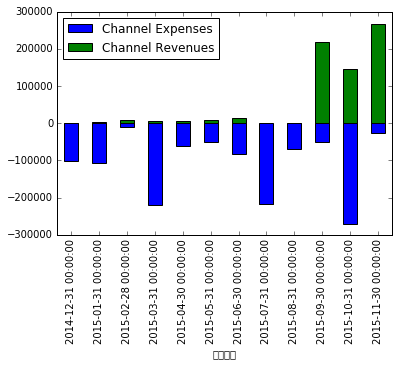

In [28]:
# 合作伙伴/渠道 支出与收入 按月对比
# 显然，渠道推广的效果评价在这里很难体现，因为有大量收入并未(也无法)按渠道统计
channel_expenses_bymonth.merge(channel_revenues_bymonth, left_index=True, right_index=True).plot.bar(stacked=True)

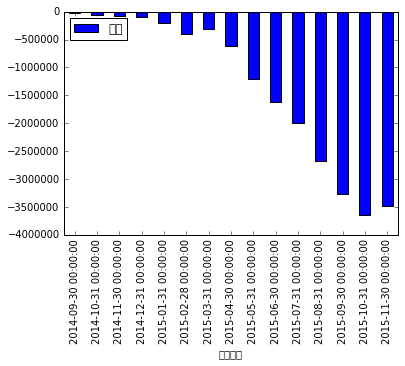

In [29]:
# 再看一下员工支出
employee_expenses.resample('M').sum().fillna(0).plot.bar()

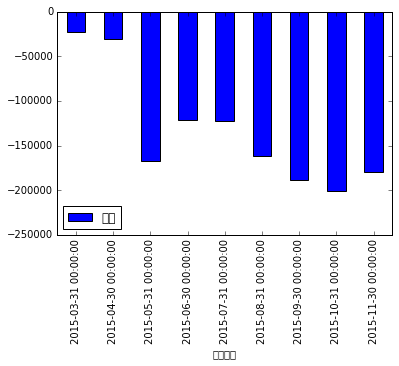

In [30]:
# 交税的图表
tax_expenses.resample('M').sum().fillna(0).plot.bar()

In [31]:
# let's recap here

# 投资人资金流入
investment
# 投资人资金流出
#暂无

# 合作伙伴资金流入
channel_revenues
# 合作伙伴资金流出
channel_expenses

# 员工资金/业力流入
#暂无
# 员工资金流出
employee_expenses

# 客户资金流入
customer_revenues
# 客户资金/业力流出
#暂无

# 其他经营流出
other_expenses

# 政府/税流出
tax_expenses


收入                 摘要     银行账户 group
交易日期                                                   
2015-03-13    -150.00                 税款  招行西二旗支行    税款
2015-03-16  -21114.84                 税款  招行西二旗支行    税款
2015-03-26   -1368.42           上海房租开票税金  招行西二旗支行    税款
2015-04-17  -30594.56                 税款  招行西二旗支行    税款
2015-05-15   -8214.40                 税款  招行西二旗支行    税款
2015-05-18    -985.73                 税款  招行西二旗支行    税款
2015-05-18  -72861.65                 税款  招行西二旗支行    税款
2015-05-18   -8013.26                 税款  招行西二旗支行    税款
2015-05-18  -20595.95                 税款  招行西二旗支行    税款
2015-05-18  -34399.26                 税款  招行西二旗支行    税款
2015-05-18  -10540.61                 税款  招行西二旗支行    税款
2015-05-18  -10590.60                 税款  招行西二旗支行    税款
2015-05-19   -1000.00  审计服务费（2014年企业所得税）  招行西二旗支行    税款
2015-06-05   -2631.58         王璐宁-房租发票税点  招行西二旗支行    税款
2015-06-05  -11230.22                 税款  招行西二旗支行    税款
2015-06-12   -1347.63                 税款  招行西二旗支行    税款
2015-06-12 -105888.41                 税款  招行西二旗支行    税款
2015-07-08   -9703.97                 税款  招行西二旗支行    税款
2015-07-08   -1164.48                 税款  招行西二旗支行    税款
2015-07-14 -112220.16                 税款  招行西二旗支行    税款
2015-08-13   -9946.53                 税款  招行西二旗支行    税款
2015-08-13   -1193.59                 税款  招行西二旗支行    税款
2015-08-14 -150563.30                 税款  招行西二旗支行    税款
2015-09-15   -8724.95                 税款  招行西二旗支行    税款
2015-09-15   -1047.00                 税款  招行西二旗支行    税款
2015-09-15 -174412.24                 税款  招行西二旗支行    税款
2015-09-23   -4004.00                 税款  招行西二旗支行    税款
2015-09-29    -100.00                 税款  招行西二旗支行    税款
2015-10-14  -25950.02                 税款  招行西二旗支行    税款
2015-10-14   -3114.00                 税款  招行西二旗支行    税款
2015-10-20 -172312.96                 税款  招行西二旗支行    税款
2015-11-13  -20659.75                 税款  招行西二旗支行    税款
2015-11-13   -2479.17                 税款  招行西二旗支行    税款
2015-11-13 -148297.41                 税款  招行西二旗支行    税款
2015-11-16   -4923.32                 税款  招行西二旗支行    税款
2015-11-16     -25.00                 税款  招行西二旗支行    税款
2015-11-16   -2500.00                 税款  招行西二旗支行    税款
2015-11-16    -500.00                 税款  招行西二旗支行    税款

In [32]:
# 生成Bamai项目dev版使用的内建示例数据
def write_csv(df, csv_name, source, dest):
    df_out = df[['收入', '摘要', 'group']]
    df_out.columns = ['amount', 'comment', 'sub_group']
    df_out['source'] = source
    df_out['dest'] = dest
    df_out.index.names = ['date']
    df_out.to_csv(csv_name)
    return df_out


In [33]:
invest_data = write_csv(investment, 'invest_in.csv', 'investor', 'self')
invest_data

amount   comment sub_group    source  dest
date                                                      
2014-08-28    600000.0   张焱股份款入资       天使轮  investor  self
2014-08-28    150000.0     任兴武注资       天使轮  investor  self
2014-08-28     50000.0     唐周屹注资       天使轮  investor  self
2014-08-29    200000.0  陈昭云摩卡股份款       天使轮  investor  self
2014-11-27   5000000.0   亚东北辰投资款       天使轮  investor  self
2015-04-14  31196500.0   鼎晖创泰投资款        A轮  investor  self
2015-04-22  12478600.0   亚东北辰投资款        A轮  investor  self
2015-08-31  10000000.0   上海田仆投资款        A轮  investor  self

In [34]:
channel_in_data = write_csv(channel_revenues, 'channel_in.csv', 'channel', 'self')
channel_in_data

amount                     comment sub_group   source  dest
date                                                                      
2014-12-19       0.19                        大众点评        点评  channel  self
2014-12-22       0.69                        大众点评        点评  channel  self
2015-01-15    2658.87             POP结算  京东12月份结算        京东  channel  self
2015-02-12    7768.07                POP结算京东1月份结算        京东  channel  self
2015-03-16    4925.91              POP结算 京东2月份结算         京东  channel  self
2015-04-30    6453.08               POP结算 京东3月份结算        京东  channel  self
2015-05-11    8971.80               POP结算 京东4月份结算        京东  channel  self
2015-06-06   13927.84                 4,5月份淘宝销售金额        淘宝  channel  self
2015-06-09       8.55                        国美结算        国美  channel  self
2015-08-07       1.00                        大众点评        点评  channel  self
2015-08-11    1008.70                        国美结算        国美  channel  self
2015-08-12       0.01                    643605微信        微信  channel  self
2015-08-17       0.22                        大众点评        点评  channel  self
2015-08-21       2.00                        大众点评        点评  channel  self
2015-08-31      22.95                        大众点评        点评  channel  self
2015-09-06   19748.70       3146656@POP结算 京东5月份结算        京东  channel  self
2015-09-06       1.00                        大众点评        点评  channel  self
2015-09-10   22508.81       3187463@POP结算 京东8月份结算        京东  channel  self
2015-09-11  122938.06  附言：3200036@POP结算备注：京东7月份结算        京东  channel  self
2015-09-12     676.92                        微信结算        微信  channel  self
2015-09-13     877.71                        微信结算        微信  channel  self
2015-09-14     877.71                        微信结算        微信  channel  self
2015-09-14   38904.27      3220689@POP结算  京东6月份结算        京东  channel  self
2015-09-16     820.07                        微信结算        微信  channel  self
2015-09-17     832.97                        微信结算        微信  channel  self
2015-09-18       1.00                        大众点评        点评  channel  self
2015-09-19    2057.59                        微信结算        微信  channel  self
2015-09-21    1277.31                        微信结算        微信  channel  self
2015-09-21      36.00         大众点评网-到家业务结算款43摩卡i车        点评  channel  self
2015-09-22    1043.70                        微信结算        微信  channel  self
...               ...                         ...       ...      ...   ...
2015-10-15     752.46                        微信结算        微信  channel  self
2015-10-16     162.01                        大众点评        点评  channel  self
2015-10-16    1156.94                        国美结算        国美  channel  self
2015-10-16      45.00              点评到家业务9月结算摩卡i车        点评  channel  self
2015-10-17    1389.61                        微信结算        微信  channel  self
2015-10-19    1138.13                        微信结算        微信  channel  self
2015-10-19      52.20             百糯通知16492902-付1        百糯  channel  self
2015-10-25    1718.63                        微信结算        微信  channel  self
2015-10-26      26.10             百糯通知16803505-付1        百糯  channel  self
2015-10-27   47869.65                678三个月淘宝店铺收入        淘宝  channel  self
2015-10-28    2347.55                  7月份收入 天猫结算        天猫  channel  self
2015-10-28    5491.93                  9月份收入 淘宝结算        淘宝  channel  self
2015-10-28   47559.94                    9月份 天猫结算        天猫  channel  self
2015-10-28   26747.39                    8月份 天猫结算        天猫  channel  self
2015-10-30     286.48                        大众点评        点评  channel  self
2015-10-31    1116.26                        微信结算        微信  channel  self
2015-11-01     695.80                        微信结算        微信  channel  self
2015-11-02      26.10             百糯通知17122376-付1        百糯  channel  self
2015-11-04    2211.65                        微信结算        微信  channel  self
2015-11-06     612.30                        微信结算        微信  channel  self
2015-11-10    1222.62                   

In [35]:
channel_out_data = write_csv(channel_expenses, 'channel_out.csv', 'self', 'channel')
channel_out_data

amount                 comment sub_group source     dest
date                                                                  
2014-11-18   -2000.0            B2B  京东平台使用费        京东   self  channel
2014-12-05  -50000.0                   京东广告费        京东   self  channel
2014-12-16   -3000.0                   京东代运营        京东   self  channel
2014-12-18   -3000.0                   京东代运营        京东   self  channel
2014-12-18   -6000.0                 良晶-百度推广        百度   self  channel
2014-12-19  -12960.0                     广告费        广告   self  channel
2014-12-22  -22135.0                文艺之声-广告费        广告   self  channel
2014-12-27   -3500.0               品信传媒微信推广费        微信   self  channel
2015-01-05  -10000.0                金婵-良晶广告费        广告   self  channel
2015-01-20  -75780.0                 文艺之声广告费        广告   self  channel
2015-01-23   -3000.0              良晶-百度推广预存款        百度   self  channel
2015-01-27  -17400.0            金婵-百度直达号开发费用        百度   self  channel
2015-02-09   -5000.0                   红人推广费        推广   self  channel
2015-02-16   -6000.0                百度推广账号充值        百度   self  channel
2015-03-10  -16000.0               国美在线平台使用费        国美   self  channel
2015-03-19  -12000.0                 京东平台使用费        京东   self  channel
2015-03-20 -184960.0                 世创汇邦广告费        广告   self  channel
2015-03-30   -5600.0                   360推广        推广   self  channel
2015-04-02   -8000.0                  百度推广费用        百度   self  channel
2015-04-03    -300.0                微信公众号认证费        微信   self  channel
2015-04-10  -25000.0                    微信合作        微信   self  channel
2015-04-13    -300.0                微信公众号认证费        微信   self  channel
2015-04-24  -16725.0                 知乎话题推广等        推广   self  channel
2015-04-30   -2000.0                 淘宝直通车充值        淘宝   self  channel
2015-04-30  -10000.0                    百度推广        百度   self  channel
2015-05-08  -50000.0                    广告费用        广告   self  channel
2015-05-29    -300.0                 微信公众号认证        微信   self  channel
2015-06-01   -6000.0                国美营销短信费用        国美   self  channel
2015-06-01   -4800.0                国美营销短信费用        国美   self  channel
2015-06-05  -22000.0                 长隆合作赞助费        赞助   self  channel
2015-06-05  -10000.0                  百度推广充值        百度   self  channel
2015-06-05   -4010.0                崔莹莹-微信大号        微信   self  channel
2015-06-12   -5000.0                 淘宝直通车充值        淘宝   self  channel
2015-06-19  -10000.0                  百度推广充值        百度   self  channel
2015-06-26  -20000.0                  百度推广充值        百度   self  channel
2015-07-07  -20000.0                 天猫推广充值等        天猫   self  channel
2015-07-10   -6000.0              国美营销短信10万条        国美   self  channel
2015-07-17  -20000.0                  百度推广充值        百度   self  channel
2015-07-28   -2240.0          体育馆A字板广告位及制作费用        广告   self  channel
2015-07-31  -20000.0                  总部百度推广        百度   self  channel
2015-07-31 -150000.0                   总部广告费        广告   self  channel
2015-08-04    -143.9            百度文库充值（线下研发）        百度   self  channel
2015-08-14  -40000.0              天猫淘宝直通车展位费        淘宝   self  channel
2015-08-21  -20000.0                   百度推广费        百度   self  channel
2015-08-25   -8000.0               大众点评技术服务费        点评   self  channel
2015-09-09  -10000.0                 大众点评推广费        点评   self  channel
2015-09-09   -6000.0                国美短信营销费用        国美   self  channel
2015-09-09    -300.0                 微信公众号认证        微信   self  channel
2015-09-11  -30000.0                  百度推广费用        百度   self  channel
2015-09-29   -3000.0                  苏宁推广费用        苏宁   self  channel
2015-10-10 -200000.0               音乐之声广告费尾款        广告   self  channel
2015-10-13  -20000.0                  百度推广费用        百度   self  channel
2015-10-25  -50000.0  天猫40000元、淘宝10000元直通车充值        淘宝   self  channel
2015-11-06  -20000.0                  百度推广费用        百度   self  channel
2015-11-06   -2000.0               音乐之

In [36]:
employee_out_data = write_csv(employee_expenses, 'employee_out.csv', 'self', 'employee')
employee_out_data

amount        comment sub_group source      dest
date                                                           
2014-09-17   -2500.00  摩卡8月员工工资  研发部        工资   self  employee
2014-09-17   -8057.14  摩卡8月员工工资  总经办        工资   self  employee
2014-09-17   -5666.67   摩卡8月员工工资  北分        工资   self  employee
2014-10-05   -1166.11          #北京社保        社保   self  employee
2014-10-05   -1490.50          #北京社保        社保   self  employee
2014-10-13   -9200.00         员工9月工资        工资   self  employee
2014-10-13   -7580.00         员工9月工资        工资   self  employee
2014-10-21  -17700.00      员工工资  研发部        工资   self  employee
2014-10-21  -16779.79      员工工资  研发部        工资   self  employee
2014-11-05   -1166.11          #北京社保        社保   self  employee
2014-11-05   -1490.50          #北京社保        社保   self  employee
2014-11-11   -2300.00          10月工资        工资   self  employee
2014-11-12  -10863.80          10月工资        工资   self  employee
2014-11-12   -9700.00          10月工资        工资   self  employee
2014-11-12   -2300.00          10月工资        工资   self  employee
2014-11-12   -2300.00          10月工资        工资   self  employee
2014-11-12   -2300.00          10月工资        工资   self  employee
2014-11-12  -16779.79          10月工资        工资   self  employee
2014-11-12  -17700.00          10月工资        工资   self  employee
2014-11-12  -12700.00          10月工资        工资   self  employee
2014-12-05   -6866.20          #北京社保        社保   self  employee
2014-12-05   -1141.87          #北京社保        社保   self  employee
2014-12-10  -15986.84        员工11月工资        工资   self  employee
2014-12-10  -19380.15        员工11月工资        工资   self  employee
2014-12-10  -16700.00        员工11月工资        工资   self  employee
2014-12-10  -17700.00        员工11月工资        工资   self  employee
2014-12-10  -12700.00        员工11月工资        工资   self  employee
2014-12-10   -6700.00        员工11月工资        工资   self  employee
2014-12-23   -7776.00       技师餐费（充卡）        餐费   self  employee
2014-12-25    -767.50       王昕-冬至午餐费        餐费   self  employee
...               ...            ...       ...    ...       ...
2015-11-13   -7422.00       王斌-团建餐费等        餐费   self  employee
2015-11-13    -614.00       张小静-交通费等       交通费   self  employee
2015-11-13    -107.00         葛玥-交通费       交通费   self  employee
2015-11-13   -1680.00       刘金宝-团建餐费        餐费   self  employee
2015-11-13   -2569.00       王昕-团建餐费等        餐费   self  employee
2015-11-18   -1989.40       刘金宝-交通费等       交通费   self  employee
2015-11-18    -380.00         汪春容-餐费        餐费   self  employee
2015-11-18    -823.00          王晔-餐费        餐费   self  employee
2015-11-18   -1937.00        万玉婷-餐费等        餐费   self  employee
2015-11-18   -1278.00        万成-交通费等       交通费   self  employee
2015-11-18    -896.30        王璐宁-餐费等        餐费   self  employee
2015-11-20   -1139.00       晁新淋-交通费等       交通费   self  employee
2015-11-20    -915.00         汪春容-餐费        餐费   self  employee
2015-11-20    -653.00         李玉勇交通费       交通费   self  employee
2015-11-21 -166167.87   10月份外阜社保外包费用        社保   self  employee
2015-11-21  -34645.50    6月份外阜社保外包费用        社保   self  employee
2015-11-24   -1446.00       王子逸-交通费等       交通费   self  employee
2015-11-24    -295.00        范佳莉-交通费       交通费   self  employee
2015-11-24   -3435.24     邓青松-10月份工资        工资   self  employee
2015-11-24    -248.00         吴仲华-餐费        餐费   self  employee
2015-11-24   -1914.00       吴仲华-团建餐费        餐费   self  employee
2015-11-24    -604.00         刘佳-交通费       交通费   self  employee
2015-11-24    -218.00         焦一易-餐费        餐费   self  employee
2015-11-24   -3580.80        王伟-交通费等       交通费   self  employee
2015-11-24    -570.00       刘金宇-交通费等       交通费   self  employee
2015-11-24   -1115.00       门盼盼-交通费等       交通费   self  employee
2015-11-24     -98.00         谭成容-餐费        餐费   self  employee
2015-11-24     -68.00        胡晓兰-交通费       交通费   self  employee
2015-11-24    -989.00         晁新淋-餐费        餐费   self  employee
2015-11-25 -103248.00    92102：住房公积金       公积金 

In [37]:
customer_in_data = write_csv(customer_revenues, 'customer_in.csv', 'customer', 'self')
customer_in_data

amount                       comment sub_group    source  dest
date                                                                        
2015-03-03    174.63                        POS机收入      POS机  customer  self
2015-03-15     17.86                        POS机收入      POS机  customer  self
2015-03-16     17.86                        POS机收入      POS机  customer  self
2015-03-20      8.93                        POS机收入      POS机  customer  self
2015-03-21      0.50                        POS机收入      POS机  customer  self
2015-03-21    132.96                        POS机收入      POS机  customer  self
2015-03-23     86.32                        POS机收入      POS机  customer  self
2015-03-24     76.40                        POS机收入      POS机  customer  self
2015-03-25    754.07                        POS机收入      POS机  customer  self
2015-03-26     85.33                        POS机收入      POS机  customer  self
2015-03-27    268.89                        POS机收入      POS机  customer  self
2015-03-27  10000.00  北京摩卡移动汽车技术服务有限公司（工商银行开户激活费用）        其他  customer  self
2015-03-30     85.33                        POS机收入      POS机  customer  self
2015-03-31    969.38                        POS机收入      POS机  customer  self
2015-04-01     45.64                        POS机收入      POS机  customer  self
2015-04-02    305.60                        POS机收入      POS机  customer  self
2015-04-03      8.93                        POS机收入      POS机  customer  self
2015-04-04      8.93                        POS机收入      POS机  customer  self
2015-04-05      8.93                        POS机收入      POS机  customer  self
2015-04-07     85.33                        POS机收入      POS机  customer  self
2015-04-08     80.37                        POS机收入      POS机  customer  self
2015-04-09    112.12                        POS机收入      POS机  customer  self
2015-04-10     44.65                        POS机收入      POS机  customer  self
2015-04-11    170.67                        POS机收入      POS机  customer  self
2015-04-12     17.86                        POS机收入      POS机  customer  self
2015-04-13     62.51                        POS机收入      POS机  customer  self
2015-04-14    584.41                        POS机收入      POS机  customer  self
2015-04-16   1072.57                        POS机收入      POS机  customer  self
2015-04-17    182.67                        POS机收入      POS机  customer  self
2015-04-18   1604.39                        POS机收入      POS机  customer  self
...              ...                           ...       ...       ...   ...
2015-11-30    963.19                        结算自动入账        其他  customer  self
2015-11-30    675.61                        POS机收入      POS机  customer  self
2015-11-30    149.25                        POS机收入      POS机  customer  self
2015-11-30  20258.00               订单收款11.25-11.29        其他  customer  self
2015-11-30    288.00                           保养卡       保养卡  customer  self
2015-11-30    100.30           提回贷记:00012671071,汇兑        其他  customer  self
2015-11-30   5430.00                          西安存现        其他  customer  self
2015-11-30    277.90                        POS机收入      POS机  customer  self
2015-11-30    473.40                        POS机收入      POS机  customer  self
2015-11-30    740.40                        POS机收入      POS机  customer  self
2015-11-30   1787.49                        POS机收入      POS机  customer  self
2015-11-30   1820.24                        POS机收入      POS机  customer  self
2015-11-30   1994.93                        POS机收入      POS机  customer  self
2015-11-30   2334.36                        POS机收入      POS机  customer  self
2015-11-30   7742.45                        POS机收入      POS机  customer  self
2015-11-30   1995.00                           保养卡       保养卡  customer  self
2015-11-30   5928.00                         天津分公司        其他  customer  self
2015-11-30  39758.25                        POS机收入      POS机  customer  self
2015-11-30   5641.00                            成都        其他  customer  self
2015-11-30

In [38]:
other_out_data = write_csv(other_expenses, 'other_out.csv', 'self', 'other')
other_expenses

收入                              摘要       银行账户 group
date                                                                  
2015-06-23     -90.00  其他应付款待清算过渡款项-分行清算专用（对公小额账户管理费）  工商银行中关村支行    其他
2015-09-21     -90.00  其他应付款待清算过渡款项-分行清算专用（对公小额账户管理费）  工商银行中关村支行    其他
2015-09-28     -12.00                   电子银行对公人民币结算收入  工商银行中关村支行    其他
2014-09-11     -35.00                    网上企业银行-数字证书费    招行西二旗支行    其他
2014-09-11     -35.00                    网上企业银行-数字证书费    招行西二旗支行    其他
2014-09-16     -35.00                    购买支票手续费-现金支票    招行西二旗支行    其他
2014-09-16   -1200.00                   任兴武8月费用报销停车费等    招行西二旗支行   停车费
2014-09-16  -10000.00                    陈燕山8月费用报销配件款    招行西二旗支行    配件
2014-09-16  -40000.00                        7-8月配件费用    招行西二旗支行    配件
2014-09-17  -45049.00                      8-9月购买维修配件    招行西二旗支行    配件
2014-09-17  -14575.53                        7-8月差旅交通    招行西二旗支行    差旅
2014-09-17  -20000.00                      张焱7-8月购买工具    招行西二旗支行    其他
2014-09-18  -20000.00                         支付开发服务费    招行西二旗支行    其他
2014-09-19   -1846.00                          采购电脑主机    招行西二旗支行    其他
2014-09-22   -2700.00                          租用员工宿舍    招行西二旗支行    其他
2014-09-23  -49851.59                    张焱7-8月购买工具费用    招行西二旗支行    其他
2014-09-23   -2000.00                        王昕中石油加油卡    招行西二旗支行    油卡
2014-09-27  -11879.00                            王昕报销    招行西二旗支行    报销
2014-09-27  -28886.00                            张焱报销    招行西二旗支行    报销
2014-09-27    -363.00                           任兴武报销    招行西二旗支行    报销
2014-09-27   -2163.00                           蔡晓东报销    招行西二旗支行    报销
2014-09-30  -40824.00                            购买配件    招行西二旗支行    配件
2014-10-04      -0.93                         网银支付手续费    招行西二旗支行    其他
2014-10-09   -4844.57                         车辆商业险代办    招行西二旗支行    其他
2014-10-10   -1400.00                      王昕-制作易拉宝海报    招行西二旗支行    其他
2014-10-12   -1748.00                      丛嘉兴-采购员工工服    招行西二旗支行    其他
2014-10-13  -10264.70                           张焱报销     招行西二旗支行    报销
2014-10-13    -560.00                           任兴武报销    招行西二旗支行    报销
2014-10-13    -815.50                           丛嘉兴报销    招行西二旗支行    报销
2014-10-13   -2584.00                           蔡晓东报销    招行西二旗支行    报销
...               ...                             ...        ...   ...
2015-11-24   -4410.70                         赵小燕-刮板等    招行西二旗支行    其他
2015-11-24    -252.00                         吴仲华-加油费    招行西二旗支行    其他
2015-11-24    -570.80                        赵小燕-内存卡等    招行西二旗支行    其他
2015-11-24   -1013.00                       徐世强-购金冷氟油    招行西二旗支行    其他
2015-11-24   -2397.00                        深圳技师停车费等    招行西二旗支行   停车费
2015-11-24   -1204.20                       刘福元-名片制作等    招行西二旗支行    其他
2015-11-24  -10628.00                          张辉-购配件    招行西二旗支行    配件
2015-11-24   -4200.00                         李玉勇-停车费    招行西二旗支行   停车费
2015-11-24   -1030.00                         陈亚林-购配件    招行西二旗支行    配件
2015-11-24    -500.00                         陈亚林-购工具    招行西二旗支行    其他
2015-11-24    -355.00                         文俊杰-购配件    招行西二旗支行    配件
2015-11-24    -920.00                        成都技师停车费等    招行西二旗支行   停车费
2015-11-24   -2519.00                       刘绩波-名片制作等    招行西二旗支行    其他
2015-11-24    -201.47                         晁新淋-加油费    招行西二旗支行    其他
2015-11-24   -4590.00                        晁新淋-物料制作    招行西二旗支行    其他
2015-11-24    -964.49                         晁新淋-宽带等    招行西二旗支行    其他
2015-11-24   -2601.50                        广州技师停车费等    招行西二旗支行   停车费
2015-11-24  -25000.00                         上海主油卡充值    招行西二旗支行    油卡
2015-11-24   -8000.00                         成都主油卡充值    招行西二旗支行    油卡
2015-11-24    -388.00                    北分订单221626退款    招行西二旗支行    其他
2015-11-24  -18060.00                         卢克伊尔机油款    招行西二旗支行    其他
2015-11-24   -5174.00                     杭州6-10月份配件款    招行西二旗支行    配件
2015-11-24   -1630.00                     苏州6-10月份配件款    招行西二旗支行    配件
2015-11-24   -5300.00        深圳宿舍房租2015.12.

In [39]:
tax_out_data = write_csv(tax_expenses, 'tax_out.csv', 'self', 'tax')
tax_expenses

收入                 摘要     银行账户 group
date                                                   
2015-03-13    -150.00                 税款  招行西二旗支行    税款
2015-03-16  -21114.84                 税款  招行西二旗支行    税款
2015-03-26   -1368.42           上海房租开票税金  招行西二旗支行    税款
2015-04-17  -30594.56                 税款  招行西二旗支行    税款
2015-05-15   -8214.40                 税款  招行西二旗支行    税款
2015-05-18    -985.73                 税款  招行西二旗支行    税款
2015-05-18  -72861.65                 税款  招行西二旗支行    税款
2015-05-18   -8013.26                 税款  招行西二旗支行    税款
2015-05-18  -20595.95                 税款  招行西二旗支行    税款
2015-05-18  -34399.26                 税款  招行西二旗支行    税款
2015-05-18  -10540.61                 税款  招行西二旗支行    税款
2015-05-18  -10590.60                 税款  招行西二旗支行    税款
2015-05-19   -1000.00  审计服务费（2014年企业所得税）  招行西二旗支行    税款
2015-06-05   -2631.58         王璐宁-房租发票税点  招行西二旗支行    税款
2015-06-05  -11230.22                 税款  招行西二旗支行    税款
2015-06-12   -1347.63                 税款  招行西二旗支行    税款
2015-06-12 -105888.41                 税款  招行西二旗支行    税款
2015-07-08   -9703.97                 税款  招行西二旗支行    税款
2015-07-08   -1164.48                 税款  招行西二旗支行    税款
2015-07-14 -112220.16                 税款  招行西二旗支行    税款
2015-08-13   -9946.53                 税款  招行西二旗支行    税款
2015-08-13   -1193.59                 税款  招行西二旗支行    税款
2015-08-14 -150563.30                 税款  招行西二旗支行    税款
2015-09-15   -8724.95                 税款  招行西二旗支行    税款
2015-09-15   -1047.00                 税款  招行西二旗支行    税款
2015-09-15 -174412.24                 税款  招行西二旗支行    税款
2015-09-23   -4004.00                 税款  招行西二旗支行    税款
2015-09-29    -100.00                 税款  招行西二旗支行    税款
2015-10-14  -25950.02                 税款  招行西二旗支行    税款
2015-10-14   -3114.00                 税款  招行西二旗支行    税款
2015-10-20 -172312.96                 税款  招行西二旗支行    税款
2015-11-13  -20659.75                 税款  招行西二旗支行    税款
2015-11-13   -2479.17                 税款  招行西二旗支行    税款
2015-11-13 -148297.41                 税款  招行西二旗支行    税款
2015-11-16   -4923.32                 税款  招行西二旗支行    税款
2015-11-16     -25.00                 税款  招行西二旗支行    税款
2015-11-16   -2500.00                 税款  招行西二旗支行    税款
2015-11-16    -500.00                 税款  招行西二旗支行    税款